# Seismographs

<img alt="Snares Island sensor" align="right" style="width:40%" src="Images/Snares_Trillium_Compact.jpg">

Seismographs are the instruments that record seismic waves. Ideally seismographs will be be able to 
record a wide range of frequencies (*broadband*) and have a wide range of amplitudes (have a high 
*dynamic range*). 

Seismographs consist of a seismometer (digital seismometers convert ground motion to voltage), and a recording system, which incorporates precise timing.  We will discuss the process of digitizing the
analogue data produced by the seismometer in the [next notebook](2_Digitizers.ipynb). 
This notebook will focus on the seismometer.

The image on the right shows a Trillium Compact broadband seismometer during installation
on Snares Island.

Relevant information for this notebook can be found in Stein and Wysession Chapter 6.6.

Seismometers attempt to measure the movement of the Earth while attached to the Earth. This is challenging
in part because the obvious reference frame (the Earth) is itself moving. The way that mechanical 
seismometers try to circumvent this problem is to measure relative to an inertial reference frame. A
simple example of an inertial system is the pendulum. We will use the example of a mass on a spring
(which is a pendulum, or simple harmonic oscillator) to demonstrate how the mechanical seismometer
works.

The equation of motion of an undamped mass on a spring system follows from Hooke's law and
Newton's second law of motion.

Recall Hooke's law:
\begin{equation*}
    F = -k\xi
\end{equation*}
where $\xi$ is displacement relative to the absolute reference frame (the case of the seismometer in our case),
$k$ is the spring constant and $F$ is force.  In the above $\xi$ is a function of time and therefore so is $F$.

Recall Newton's second law of motion:
\begin{equation*}
    F = ma \implies -k\xi = m\frac{d^2 \xi}{dt^2}
\end{equation*}
where $m$ is the sprung mass.

The natural frequency $\omega_0$ of the system is defined as:
\begin{equation*}
    \omega_0^2 \equiv \frac{k}{m}
\end{equation*}

Therefore the overall equation of motion of this system is
\begin{equation*}
    \frac{d^2 \xi}{dt^2} = -\omega_0^2\xi
\end{equation*}

A solution to this system is:
\begin{equation*}
    \xi = A\cos(\omega_0t + \delta)
\end{equation*}
where $A$ is the amplitude of the oscillation and $\delta$ is a phase constant.

We can see that this a solution by taking the second differential:
\begin{equation*}
    \frac{d^2\xi}{dt^2} = -\omega_0^2A\cos(\omega_0t + \delta)
\end{equation*}

Below is a function to calculate the displacement of a mass for a simple harmonic oscillator:

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Makes plots work well with dark theme

def plot_shm(mass, spring_constant, initial_amplitude=2.0, initial_velocity=0.0,
             time_step=0.05, length=100):
    """
    Calculate the oscillation of an undamped simple harmonic oscillator and plot.
    
    :type mass: float
    :param mass: Mass of object on spring (kg)
    :type spring_constant: float
    :param spring_constant: Spring constant of spring (kg/m)
    :type initial_amplitude: float
    :param initial_amplitude: Initial step displacement at time=0 (m)
    :type initial_velocity: float
    :param initial_velocity: Initial velocity at time=0 (m/s)
    :type time_step: float
    :param time_step: Sample interval in seconds
    :type length: float
    :param length: Duration of waveform in seconds
    """
    time_samples = np.arange(0, length, time_step)
    displacements = np.zeros_like(time_samples)
    velocities = np.zeros_like(time_samples)
    
    displacements[0] = initial_amplitude
    velocities[0] = initial_velocity
    
    omega = np.sqrt(spring_constant / mass)
    delta = np.arctan(np.radians(initial_velocity / (-omega * initial_amplitude)))
    amplitude = initial_amplitude / np.cos(delta)

    for i in range(len(time_samples) - 1):
        displacements[i + 1] = amplitude * np.cos(
            omega * time_samples[i] + delta)

    plt.plot(time_samples, displacements)
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement (m)")

**Exercise:** Try playing with different masses and spring-constants - you will 
note that the frequency of oscillations changes based on the spring constant and mass.

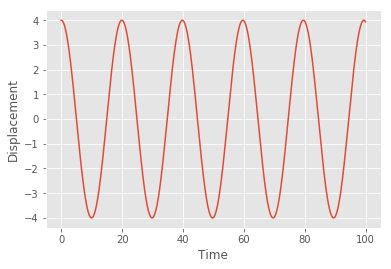

In [37]:
mass = 10.0
spring_constant = 1.0
initial_amplitude = 4
initial_velocity = 0

plot_shm(mass=mass, spring_constant=spring_constant,
         initial_amplitude=initial_amplitude,
         initial_velocity=initial_velocity)

These oscillations continue forever, which isn't good if you want to measure responses in the Earth. If we add damping we can
stop these osciallations.  When we add damping our equation becomes:
\begin{equation*}
    \frac{d^2\xi}{dt^2} + 2\varepsilon\frac{d\xi}{dt} + \omega_0^2\xi = 0
\end{equation*}
where $\varepsilon$ is the damping parameter, $\varepsilon = c / 2m$, with $c$ as the damping coefficient.

A solution to this (for the underdamped case) is
\begin{equation*}
    \xi = Ae^{-t\varepsilon / 2m}\cos(\omega't + \delta)
\end{equation*}
where $\omega'$ is related to the natural frequency by
\begin{equation*}
    \omega' = \omega_0\sqrt{1 - \frac{b}{2m\omega_0}^2}
\end{equation*}

This is coded below:

In [56]:
def plot_damped_shm(mass, spring_constant, percent_damping=100.0, initial_amplitude=2.0,
                    initial_velocity=0.0, time_step=0.05, length=100):
    """
    Calculate the oscillation of an underdamped simple harmonic oscillator and plot.
    
    :type mass: float
    :param mass: Mass of object on spring (kg)
    :type spring_constant: float
    :param spring_constant: Spring constant of spring (kg/m)
    :type percent_damping: float
    :param percent_damping: Percentage damping - will error if > 100.
    :type initial_amplitude: float
    :param initial_amplitude: Initial step displacement at time=0 (m)
    :type initial_velocity: float
    :param initial_velocity: Initial velocity at time=0 (m/s)
    :type time_step: float
    :param time_step: Sample interval in seconds
    :type length: float
    :param length: Duration of waveform in seconds
    """
    if percent_damping > 100:
        raise NotImplementedError("Only implemented underdamped solution")
    time_samples = np.arange(0, length, time_step)
    displacements = np.zeros_like(time_samples)
    velocities = np.zeros_like(time_samples)
    
    displacements[0] = initial_amplitude
    velocities[0] = initial_velocity
    
    omega = np.sqrt(spring_constant / mass)
    delta = np.arctan(np.radians(initial_velocity / (-omega * initial_amplitude)))
    amplitude = initial_amplitude / np.cos(delta)
    critical_damping = 2 * mass * omega
    damping = (percent_damping / 100) * critical_damping
    freq = omega * np.sqrt(1 - (damping / (2 * mass * omega)) ** 2)

    for i in range(len(time_samples) - 1):
        displacements[i + 1] = amplitude * np.exp(
            (-damping / (2 * mass)) * time_samples[i]) * np.cos(
            freq * time_samples[i] + delta)

    plt.plot(time_samples, displacements)
    plt.xlabel("Time")
    plt.ylabel("Displacement")

**Exercise:**  Play with different damping parameters and see what happens.  Note that in 
the overdamped case (which is not shown here) there is no oscillation.

What do you think would be ideal for a seismometer?

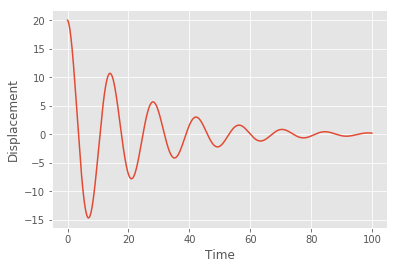

In [69]:
plot_damped_shm(mass=20, spring_constant=4, percent_damping=10, 
                initial_amplitude=20)

## Seismometer response to ground motion

So far we have just considered some initial conditions in our system, with no subsequent forcing.  This
kind of step-change with no following motion rarely/never happens in the Earth.  When we consider
that the Earth is forcing our seismometer we end up with the equation
\begin{equation*}
    \frac{d^2\xi}{dt^2} + 2\varepsilon\frac{d\xi}{dt} + \omega_0^2\xi = \frac{d^2u}{dt^2}
\end{equation*}
where $u$ is the ground displacement that forces the seismometer.

To solve we assume that:
\begin{equation*}
    u(t) = e^{-i\omega t}  \textrm{ and } \xi(t) = X(\omega)e^{-i\omega t}
\end{equation*}
where $X(\omega)$ is the *ampltide response* of the seismometer and $\omega$ is the forcing frequency.

By substitution we see that:
\begin{equation*}
    X(\omega) = \frac{-\omega^2}{\omega^2 - \omega_0^2 + 2\varepsilon i\omega}
\end{equation*}

$X(\omega)$ is complex - see Stein and Wysession (6.6) for a discussion of how amplitude and phase vary with
damping factor.

## Modern Seismographs

Modern seismometers use a force-balance system rather than a fully mechanical system - this system uses a negative feedback
loop to reduce the relative motion of masses in the sensor. This reduces resonance in the system and increases sensitivty,
linearity and dynamic range of the seismometer.  This system also reduces the need for large masses (see above systems for
why you need a large mass to be sensitive to long-period oscillations), which allows us to use smaller sensors.

From this we can see that the response of an instrument to ground shaking has two components, a phase and an amplitude
response.  These responses are requency dependent.  This is where we get the idea of seismometers being sensitive to
a set range of frequencies:
- short-period seismometers are most sensitive to high-frequency shaking;
- long-period seismometers are most sensitive to low-frequency shaking;
- broadband seismometers are sensitive to a range of frequencies.

Different applications, that care about different frequencies, might prefer to use a different type of seismometer, for
instance, active-source experiments usually use short-period instruments, which are usually more robust than broadband
systems, and are sensitive to the frequencies of their source. Generally in earthquake seismology broadband instruments
are preferable as they allow us to study a more complete spectrum of the seismic source.

## Instrument response

How a seismograph responds to ground motion is described by the instrument response. This is generally
a convolution of the seismometer response, the Finite Impulse Response (FIR) filters applied by the
digitizer, and the gain applied by the digitizer. As long as we know the instrument response we
can simulate the ground motion from the recorded waveforms: we need to do this to measure things
like peak ground motion (usually either Peak Ground Velocity (PGV) or Peak Ground Acceleration (PGA)),
or to infer seismic moment.

Correction for instrument response is via deconvolution of the frequency response from the recorded
data. Deconvolutions are often computed as division in the frequency domain (see 
[the filtering notebook](4_Filtering_Resampling.ipynb) for details on convolutions), however,
division of low-values can be numberically unstable, so when we perform this deconvolution
we can apply a "water-level" that suppresses the instrument response for values below
this level (in dB).

[Obspy](www.obspy.org) provides routines for working with seismic data (in the
[obspy introduction](5_Intro_To_Obspy.ipynb) we will look more into what obspy provides), including
ways of getting data from data centres and plotting and removing instrument response.

The function below uses obspy functions to download data from GeoNet for the 6 minutes after
the Kaikoura 2016 M7.8 earthquake in New Zealand. It then gets the response information from
the GeoNet FDSN server, pre-filters the data and applies a "water-level" to stabalise the
deconvolution of the instrument response from the data.  The results are plotted.

In [90]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

def get_and_remove_response(station, channel, location="*", output="DISP",
                            t1=UTCDateTime(2016, 11, 13, 11, 2, 56),
                            duration=360):
    """
    Get seismic data for a GeoNet station and remove the 
    instrument response.
    
    :type station: str
    :param station: Station in the GeoNet network
    :type channel: str
    :param channel: Channel SEED string to download
    :type output: str
    :param output: Output, either DISP, VEL or ACC
    :type t1: UTCDateTime
    :param t1: Start-time for data to download
    :type duration: float
    :param duration: Duration to download
    """
    client = Client("GEONET")
    st = client.get_waveforms(
        network="NZ", station=station, location=location,
        channel=channel, starttime=t1, endtime=t1 + duration)
    tr = st.merge()[0]
    inv = client.get_stations(
        network=tr.stats.network, station=tr.stats.station,
        location=tr.stats.location, channel=tr.stats.channel,
        level="response", startbefore=t1, endafter=t1 + duration)
    pre_filt = (0.005, 0.006, 30.0, 35.0)
    tr.remove_response(output=output, pre_filt=pre_filt, plot=True,
                       water_level=60, inventory=inv)

We can try this on a few stations. See the [GeoNet station search](https://www.geonet.org.nz/data/network/sensor/map) 
to find stations of interest. Note that broadband instruments throughout much of New Zealand
have clipped waveforms.  The discontinuities at these clips make the Fourier transform 
unstable and result in artefacts, we can use the water-level to suppress some of these
artefacts.  This relates to the need for seismographs to have a high dynamic range.

Below we try with a range of instruments, starting with a broadband in Fox Glacier:

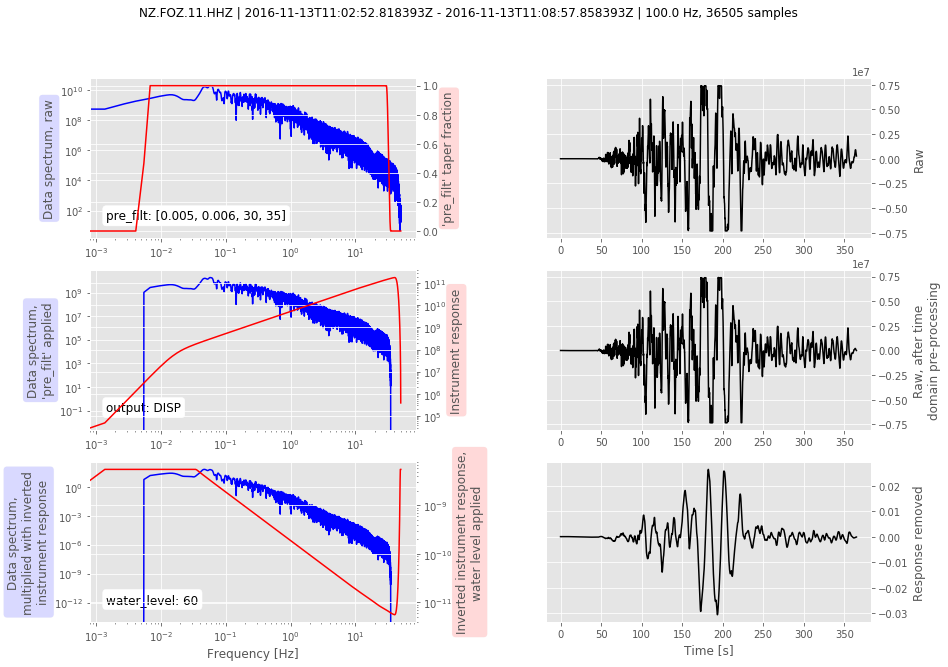

In [91]:
get_and_remove_response(station="FOZ", channel="HHZ", location="11")

Next we will try a short-period borehole sensor in the DFDP-1 borehole near Whataroa:

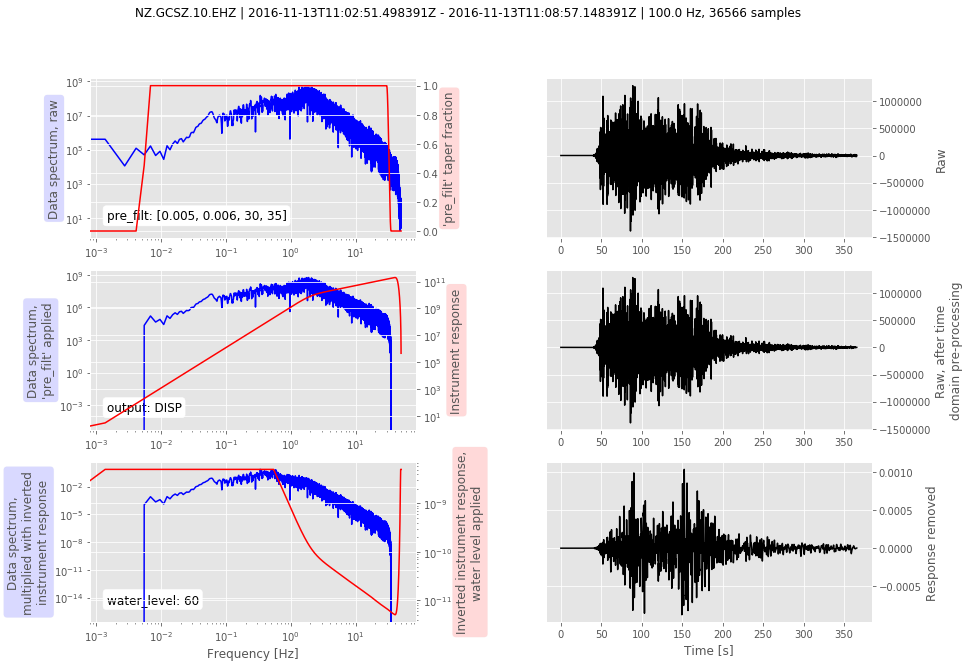

In [85]:
get_and_remove_response(station="GCSZ", channel="EHZ")  
# Note the difference in channel naming for the short-period instrument

Next lets try a strong-motion instrument - these use accelerometers rather than seismometers,
so converting to displacement is often unstable (numerical double integration can strongly 
amplify artefacts).  The instrument plotted here is in Franz Josef on the West Coast.

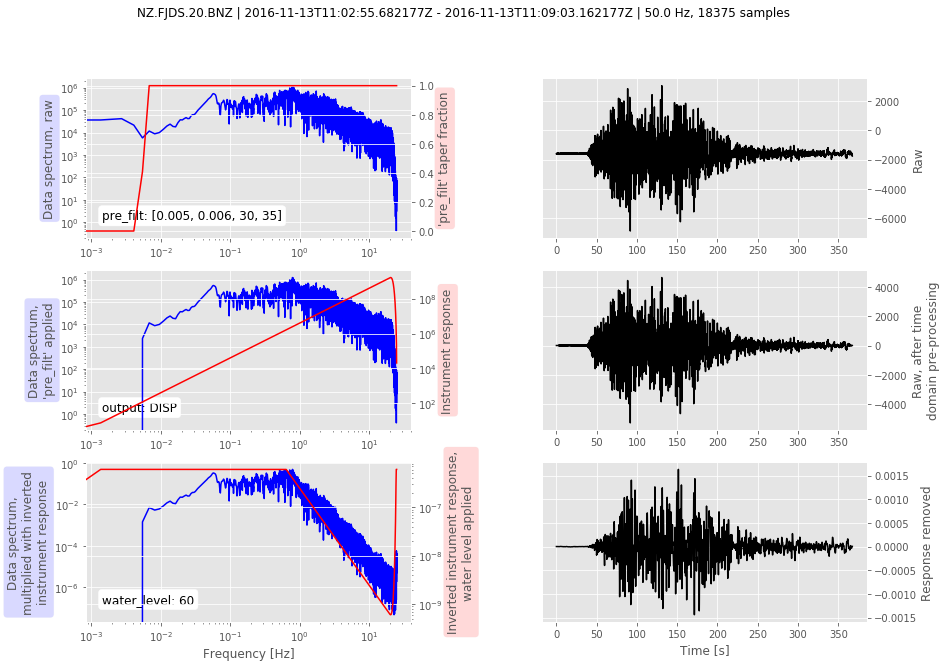

In [87]:
get_and_remove_response(station="FJDS", channel="BNZ")

**Excercise:** Try a few other stations around New Zealand, you can try a shorter waveform as well, or
another time that you are interested in.  

You will note that the different sensors are 
sensitive to different frequencies, and amplitudes of motion: the strong-motion sites are
designed to only be sensitive to  strong motion, whereas the broadband instruments
are often termed "weak-motion" sites.

**Question:** Compare the range of displacements recorded at these sites - GCSZ is closest to the mainshock
and FOZ is farthest away.  There is a decay in maximum displacement with distance that
is resolvable after removing the instrument response.  Try this with a few other sites at 
different distances - does this relationship remain consistent?

## Conclusion

For further reading (beyond Stein and Wysession, Chaper 6) see Hazskov, J. and Alguacil, G., 
Instrumentation in Earthquake Seismology: Chapter 2.

The [seismo-live notebook](https://github.com/krischer/seismo_live/blob/master/notebooks/General%20Seismology/instrument_response.ipynb) on instrument correction has some other useful practical examples of instrument response correction.

In the [next notebook](2_Digitizers.ipynb) we will think about how we convert these analogue systems into
digital data that we can store in binary format on disks and analyse. This will introduce the next step
in the seismograph response.